In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coords = pd.read_csv('coordinates.csv',header=None,names=['x','y'])

In [3]:
pd.read_csv?

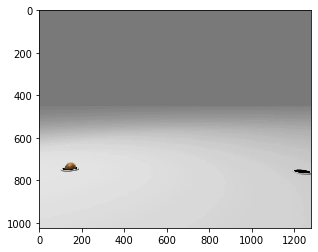

In [4]:
im = plt.imread('frames/frame1.png')
plt.imshow(im)

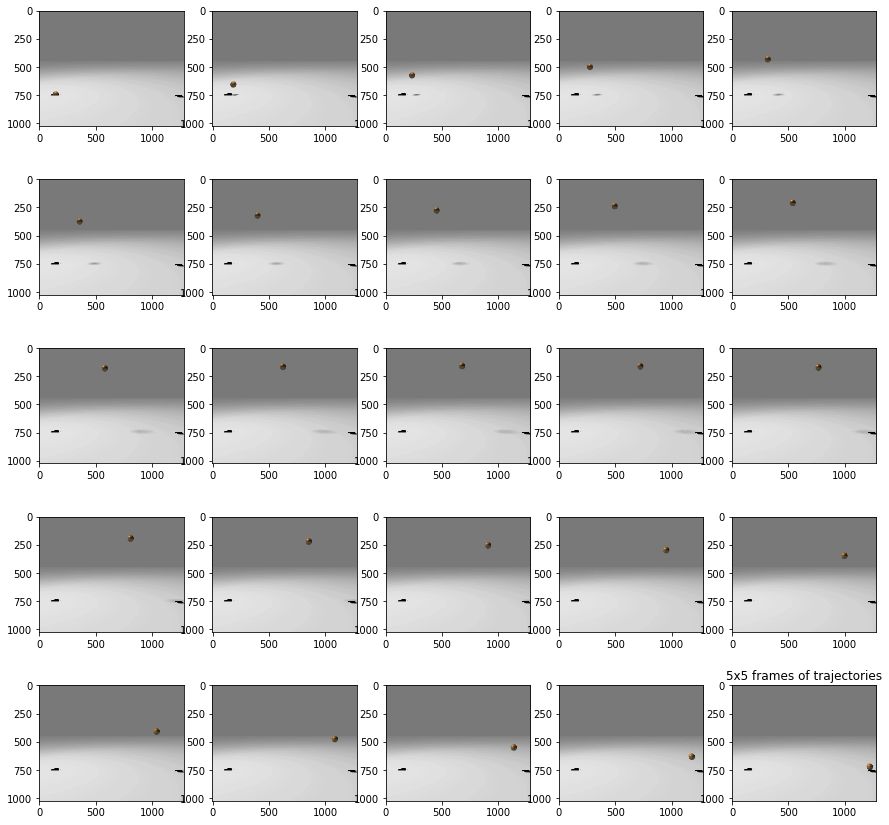

In [5]:
plt.figure(figsize= (15,15))
for i in range(1,26):
    plt.subplot(5,5,i)
    im = plt.imread('frames/frame{}.png'.format(i))
    plt.imshow(im)
plt.title('5x5 frames of trajectories');

In [6]:
coords.head()


,x,y
0,148,742
1,190,659
2,232,575
3,276,503
4,318,435


In [7]:
## creating data to fit to parabola
coords['1'] = np.ones(len(coords))
coords['x^2'] = coords['x']*coords['x']
coords = coords[['y','1','x','x^2']]
coords.head()


,y,1,x,x^2
0,742,1.0,148,21904
1,659,1.0,190,36100
2,575,1.0,232,53824
3,503,1.0,276,76176
4,435,1.0,318,101124


In [8]:
## fitting(x,y) data points to parabola ax2 +bx+c
y = coords['y'] 
A = coords[['1','x','x^2']]
A = A.values
A
invAA = np.linalg.inv(np.matmul(A.T,A))

params = np.dot(invAA,np.dot(A.T,y))
params

array([ 1.09911893e+03, -2.70728396e+00,  1.96630583e-03])

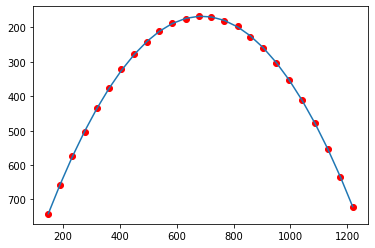

In [9]:
##plotting points and parabola fit
plt.plot(coords['x'],coords['y'],'ro')
eqn = np.dot(A, params.T)
plt.plot(coords['x'],eqn)
plt.gca().invert_yaxis()

In [10]:
len(coords['x'])

25

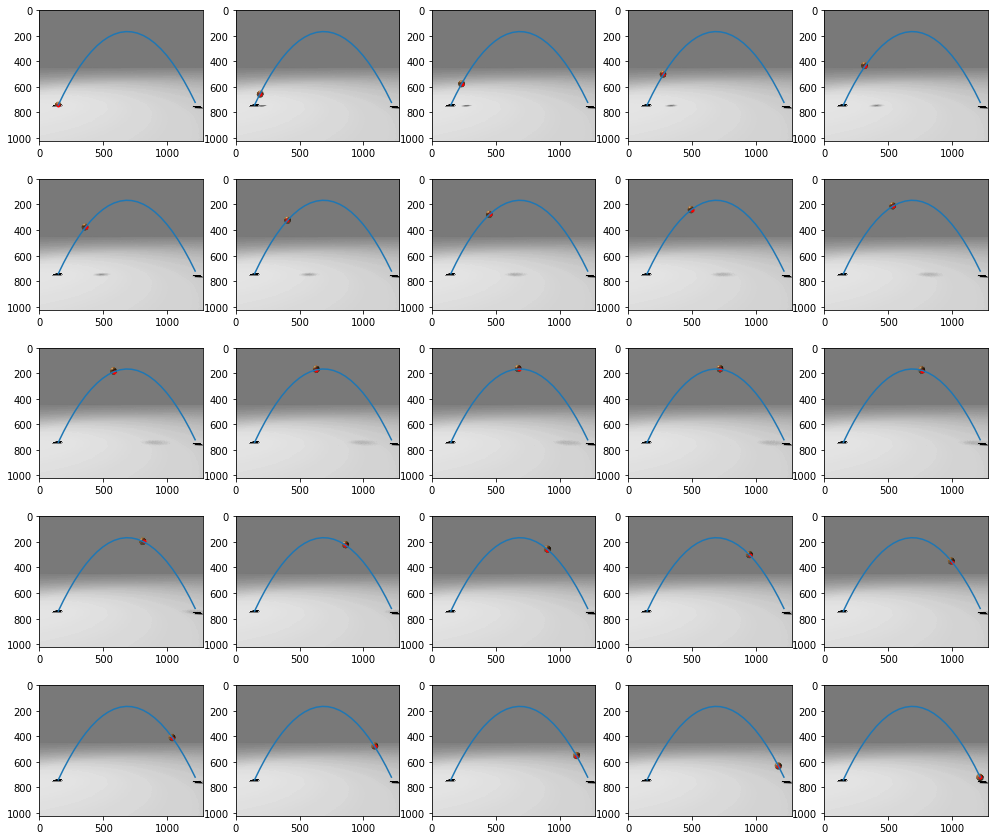

In [11]:
#plotting frames of image to check fit
plt.figure(figsize= (17,15))
plt.title('5x5 frames of trajectories');
for i in range(1,26):
    plt.subplot(5,5,i)
    im = plt.imread('frames/frame{}.png'.format(i))
    plt.imshow(im)
    plt.plot(coords['x'][i-1],coords['y'][i-1],'r.')
    eqn = np.dot(A, params.T)
    plt.plot(coords['x'],eqn)
    #plt.gca().invert_yaxis()


In [14]:
import time
from IPython.display import clear_output

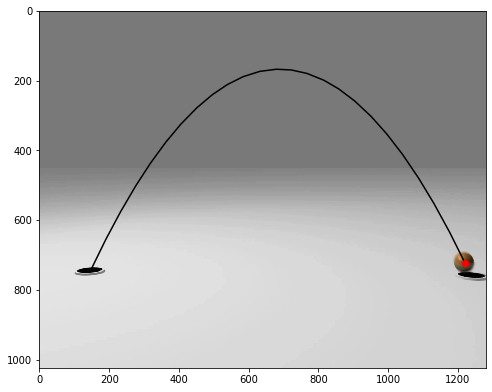

In [21]:
# movie.
for i in range(1,26):
    #plt.subplot(5,5,i)
    plt.figure(figsize= (8,8))
#     plt.title('5x5 frames of trajectories');
    im = plt.imread('frames/frame{}.png'.format(i))
    plt.imshow(im)
    eqn = np.dot(A, params.T)
    plt.plot(coords['x'],eqn,'k')
    plt.plot(coords['x'][i-1],coords['y'][i-1],'ro')
    
    plt.show()
    time.sleep(0.125)
    clear_output(wait=True)
